# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [67]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Text(0, 0.5, 'y')

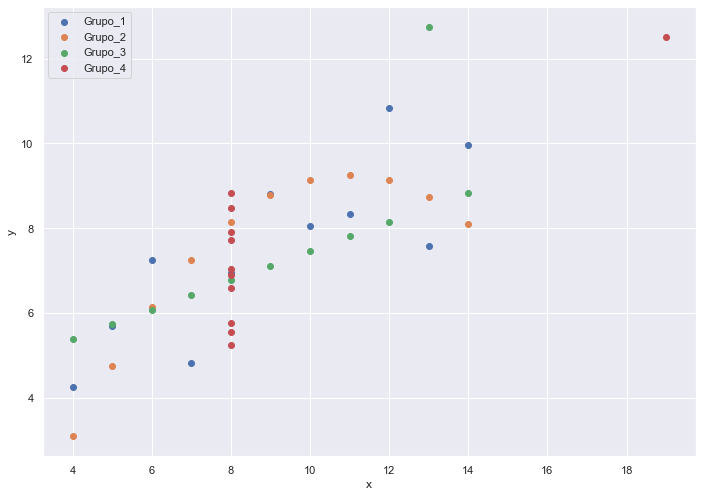

In [68]:
#grafico de todos los grupos juntos
fig,ax = plt.subplots()
for group in df['grupo'].unique():
    x_axis = df.loc[df['grupo']== group, 'x']
    y_axis = df.loc[df['grupo']== group, 'y']
    ax.scatter(x_axis,y_axis,label=group)
    
ax.legend()
ax.grid(True)

plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 1.0, 'Grupo 4')

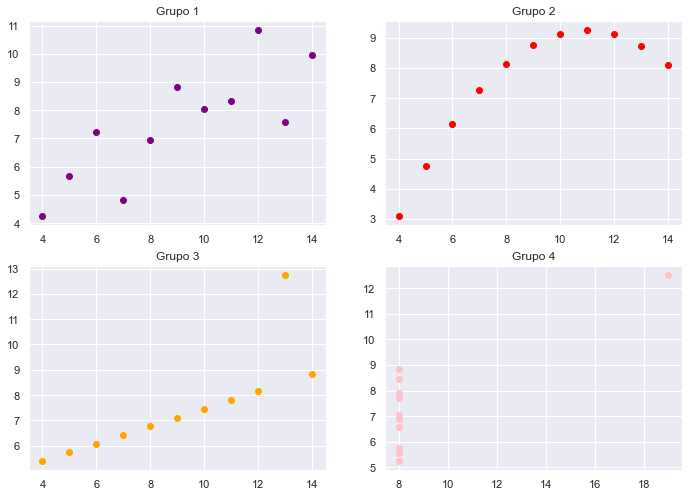

In [69]:
#grafico de todos los grupos por separado
x_1=df.loc[df['grupo']=='Grupo_1']['x']
y_1=df.loc[df['grupo']=='Grupo_1']['y']
x_2=df.loc[df['grupo']=='Grupo_2']['x']
y_2=df.loc[df['grupo']=='Grupo_2']['y']
x_3=df.loc[df['grupo']=='Grupo_3']['x']
y_3=df.loc[df['grupo']=='Grupo_3']['y']
x_4=df.loc[df['grupo']=='Grupo_4']['x']
y_4=df.loc[df['grupo']=='Grupo_4']['y']

plt.subplot(221)
plt.scatter(x_1,y_1,color='purple')
plt.title('Grupo 1')

plt.subplot(222)
plt.scatter(x_2,y_2,color='red')
plt.title('Grupo 2')

plt.subplot(223)
plt.scatter(x_3,y_3,color='orange')
plt.title('Grupo 3')

plt.subplot(224)
plt.scatter(x_4,y_4,color='pink')
plt.title('Grupo 4')



Podemos apreciar que a simple vista, aunque el grupo uno y dos podrian tener un comportamiento cercano al realizar regresion, los grupos son bastante distintos entre si

2. Resumen medidas estadisticas

In [70]:
for i in range(1,5):
    i='Grupo_'+str(i)
    print(i)
    print(df.loc[df['grupo']==i].describe())
    print()

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Grupo_4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000

Los cuatro grupos tienen medidas estadisticas muy similares, el dato que se puede ver variar notoriamente es el max para y, y podemos apreciar que los valores en y tienen un delta mayor que os de x para los distintos grupos.

3. Ajuste lineal

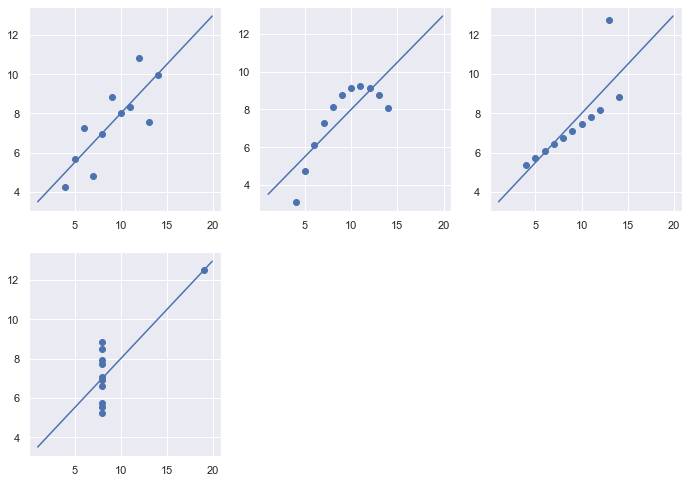

In [71]:
from sklearn.linear_model import LinearRegression

list=[[x_1,y_1],[x_2,y_2],[x_3,y_3],[x_4,y_4]]
model_rl = LinearRegression()

for i in range(0,4):
    model_rl.fit(pd.DataFrame(list[i][0]),pd.DataFrame(list[i][1]))
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]
    
    plt.subplot(2,3,i+1)
    plt.scatter(list[i][0],list[i][1])
    x_range = np.arange(1,20,0.1)
    plt.plot(x_range,beta_0+beta_1*x_range)

Podemos ver que las todas rectas de los ajustes poseen la misma pendiente, es decir, que pese a la diferencia en los graficos sobre los grupos su comportamiento al realizar el ajuste es similar.

4. Resultados de las metricas

In [72]:
import statsmodels.api as sm
from metrics_regression import *
from sklearn.metrics import r2_score

In [73]:
#Grupo 1

model = sm.OLS(y_1, sm.add_constant(x_1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00217
Time:                        13:08:37   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [76]:
lista=[]
for i in model_rl.predict(pd.DataFrame(x_1)).tolist():
    lista.append(i[0])
lista


# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_1,
        'yhat': lista
        }
)
print('\nMetricas para el grupo 1:\n')
summary_metrics(df_temp)


Metricas para el grupo 1:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.8373,1.2512,1.1185,0.1213,0.119,0.1116,0.1048,0.1167


Como podemos ver los errores porcentuales son cercanos a 10%, por lo tanto el modelo lineal se ajusta de buena manera a los datos de este grupo.

In [77]:
#Grupo 2

model = sm.OLS(y_2, sm.add_constant(x_2))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00218
Time:                        13:09:26   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [78]:

lista=[]
for i in model_rl.predict(pd.DataFrame(x_2)).tolist():
    lista.append(i[0])
lista


# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_2,
        'yhat': lista
        }
)
print('\nMetricas para el grupo 2:\n')
summary_metrics(df_temp)


Metricas para el grupo 2:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.9679,1.2524,1.1191,0.157,0.1504,0.129,0.1315,0.1438


podemos ver que los errores porcentuales son cercanos al 15%, ademas tiene un R^2 de 0.666, por lo que podemos deducir que una recta no es el mejor ajuste para este grupo.

In [79]:
#Grupo 3

model = sm.OLS(y_3, sm.add_constant(x_3))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00218
Time:                        13:09:52   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.0

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [80]:
lista=[]
for i in model_rl.predict(pd.DataFrame(x_3)).tolist():
    lista.append(i[0])
lista



# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_3,
        'yhat': lista
        }
)
print('\nMetricas para el grupo 3\n')
summary_metrics(df_temp)


Metricas para el grupo 3



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.7165,1.2506,1.1183,0.0798,0.0791,0.0955,0.0713,0.0815


podemos ver que en este caso los errores porcentuales son cercanos al 7%, y su R^2 es de 0,666, lo que s epuede interpretar como que el ajuste lineal es apropiado, los datos se acercan a ser una recta, pero exiten datos que se escapan (outlier)

In [81]:
#Grupo 4

model = sm.OLS(y_4, sm.add_constant(x_4))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00216
Time:                        13:10:15   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.0

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [82]:
lista=[]
for i in model_rl.predict(pd.DataFrame(x_4)).tolist():
    lista.append(i[0])
lista



# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_4,
        'yhat': lista
        }
)
print('\nMetricas para el grupo 4:\n')
summary_metrics(df_temp)


Metricas para el grupo 4:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.9027,1.2493,1.1177,0.1347,0.1324,0.1203,0.1167,0.1303


5. Estrategia

Para el caso del grupo 1, si bien los datos estan algo dispersos, el ajuste lineal es el mas apropiado para este caso

Para el caso del grupo 2, se puede hacer un ajuste polinomial de los datos, ya que notoriamente es una curva (parabola), como se ve a cotinuación

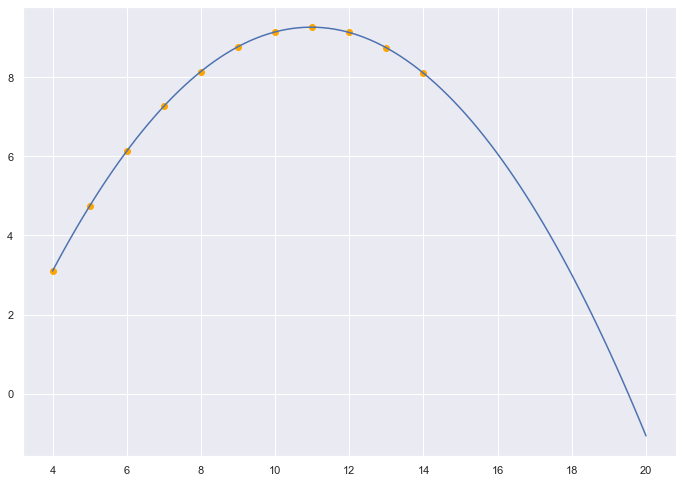

0.999999457857722

In [83]:
#Grupo 2
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data= df.loc[df["grupo"]=="Grupo_2"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]

X = data.x # we only take the first two features.
y = data.y
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

myline = numpy.linspace(4, 20, 100)

plt.scatter(X, y,color="orange")
plt.plot(myline, mymodel(myline))
plt.show()


r2_score(y, mymodel(X))

Para el caso del grupo 3, vemos que si no consideramos el dato ahislado que no sigue el mismo patron que los otros, el ajuste lineal es muy preciso, como se ve a continuación

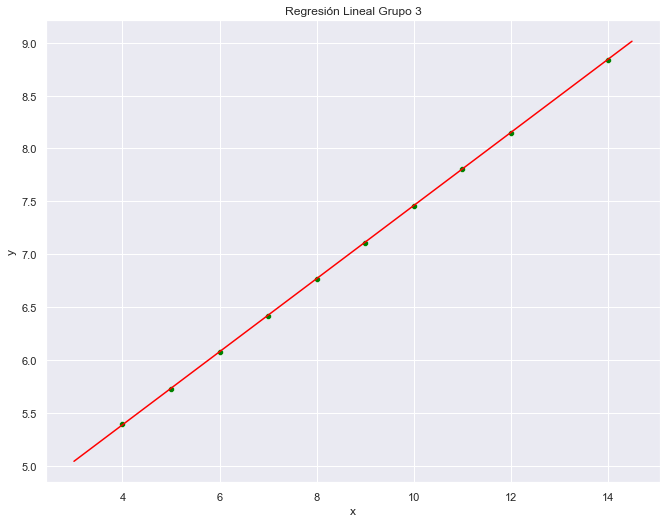

0.999993107581533

In [84]:
#Grupo 3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# import some data to play with
data= df.loc[df["grupo"]=="Grupo_3"]
mask=data["y"]<12 ##elimina outlaier
data= data[mask]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X, y) 
# graficos con seaborn

beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]

x_range = np.arange(3,15,0.5)

df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})

df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})

fig, ax = plt.subplots(figsize=(11, 8.5))


sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="green")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regresión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred = model_rl.predict(X)

r2_score(y, y_pred)

Para el caso del grupo 4, una buena estrategia seria invertir el grafico (cambiar los ejes), y no considerar el ultimo dato que es el aislado, y ahi realizar un ajuste lineal.